In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf

from sklearn.metrics import accuracy_score


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv(r"C:\Users\Chaibedraa\ML\Heart\heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.size

4242

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


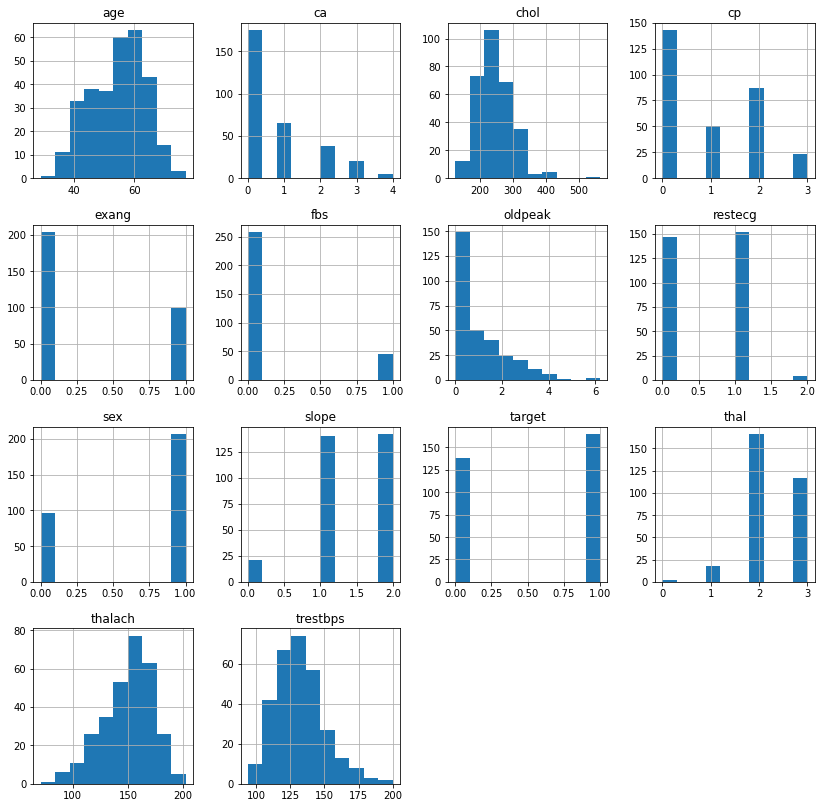

In [12]:
df.hist(figsize=(14,14))
plt.show()

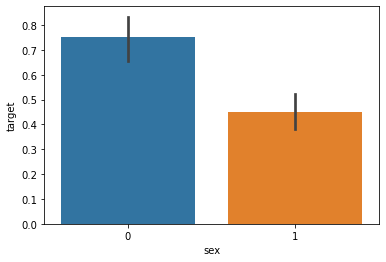

In [13]:
sns.barplot(df['sex'], df['target'])
plt.show()

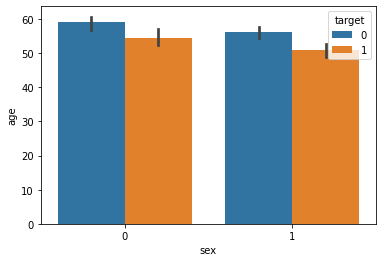

In [14]:
sns.barplot(df['sex'], df['age'], hue = df['target'])
plt.show()

In [15]:
px.bar(df, df['sex'], df['target'])

In [16]:
numeric_columns = ['trestbps', 'chol', 'age', 'oldpeak', 'thalach']

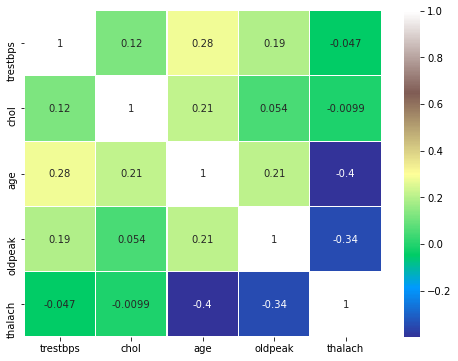

In [17]:
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap = 'terrain', linewidths = 0.1)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

Text(0.5, 1.0, 'Age of patients without heart disease')

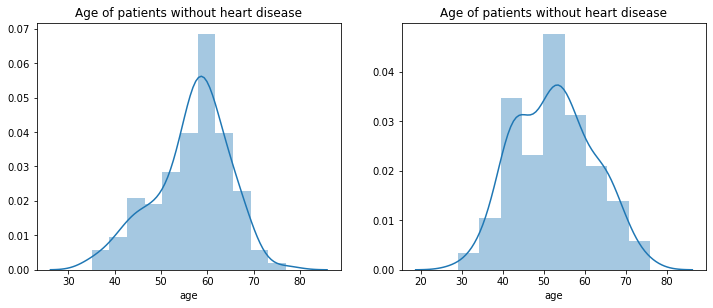

In [18]:
plt.figure(figsize = (12, 10))
plt.subplot(221)
sns.distplot(df[df['target'] == 0].age)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(df[df['target'] == 1].age)
plt.title('Age of patients without heart disease')


In [19]:
x, y = df.loc[:, :'thal'], df['target']
x, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [20]:
x.size

3939

In [21]:
from sklearn.model_selection import train_test_split

In [55]:
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std, y, random_state = 10, test_size = 0.3, shuffle = True)

In [56]:
x_train_std.shape

(212, 13)

In [24]:
x_test.shape

(91, 13)

In [25]:
y_test.size

91

In [58]:
x_train_std
x_test_std


array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [27]:
x_train.drop("fbs", axis = 1, inplace = True)
x_test.drop('fbs', axis = 1, inplace = True)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [29]:
x_test


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,165,0,2.5,1,1,3
229,64,1,2,125,309,1,131,1,1.8,1,0,3
126,47,1,0,112,204,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,1,163,0,0.0,2,0,2
21,44,1,2,130,233,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,184,0,0.0,2,0,2


In [30]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [31]:
prediction = dt.predict(x_test)
prediction

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [32]:
accuracy_dt = accuracy_score(y_test, prediction)*100

In [33]:
accuracy_dt

72.52747252747253

In [34]:
dt.feature_importances_

array([0.07489888, 0.03461456, 0.33832546, 0.08347568, 0.092912  ,
       0.0129521 , 0.06609835, 0.04724994, 0.05354622, 0.07645805,
       0.10975468, 0.00971408])

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (13).

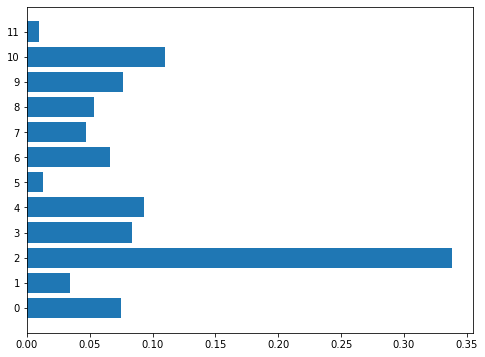

In [35]:
def plot_feature_importance(model):
    plt.figure(figsize=(8, 6))
    n_features = 12
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

    
plot_feature_importance(dt)

In [36]:
x_test


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,165,0,2.5,1,1,3
229,64,1,2,125,309,1,131,1,1.8,1,0,3
126,47,1,0,112,204,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,1,163,0,0.0,2,0,2
21,44,1,2,130,233,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,184,0,0.0,2,0,2


In [52]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(x)

x_std = std.transform(x)

In [53]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [54]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
Category = ['NO, you don\'t have heart disease', 'Yes, you have heart disease']

In [39]:
custom_data = np.array([[57, 0, 0, 140, 241, 1, 123, 1, 0.2, 1, 0, 3]])

In [40]:
custom_data_prediction_dt = dt.predict(custom_data)

In [41]:
custom_data_prediction_dt

array([0], dtype=int64)

In [42]:
print(Category[int(custom_data_prediction_dt)])

NO, you don't have heart disease


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
prediction_knn = knn.predict(x_test_std)

In [93]:
accuracy_knn = accuracy_score(y_test, prediction)*100

In [94]:
accuracy_knn

72.52747252747253

In [95]:
custom_data_knn = np.array([[63, 1, 3, 145, 233, 0,  0, 150, 0, 2.3, 0, 0, 1]])

In [96]:
custom_data_knn_std = std.transform(custom_data_knn)

In [97]:
custom_data_knn_std

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        -0.41763453, -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271]])

In [98]:
custom_data_prediction_knn = knn.predict(custom_data_knn_std)

In [99]:
custom_data_prediction_knn

array([1], dtype=int64)

In [100]:
Category[int(custom_data_prediction_knn)]

'Yes, you have heart disease'

In [101]:
k_range = range(1, 26)
scores = {}
scores_list = []

In [102]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_std, y_train)
    prediction_knn = knn.predict(x_test_std)
    scores[k] = accuracy_score(y_test, prediction_knn)
    scores_list.append(accuracy_score(y_test, prediction_knn))

In [103]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

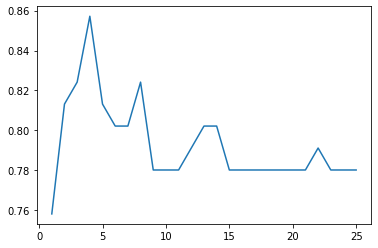

In [104]:
plt.plot(k_range, scores_list)

In [105]:
px.line(x = k_range, y = scores_list)

In [106]:
algorithms = ['Decision Tree', 'KNN']
scores = [accuracy_dt, accuracy_knn]


<AxesSubplot:>

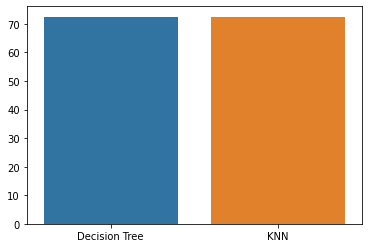

In [108]:
sns.barplot(algorithms, scores)